<a href="https://colab.research.google.com/github/clerenc-24/School_Work/blob/main/AS1_Image_Captioning_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 - Image Captioning**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Assignments</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://repository-images.githubusercontent.com/83958320/8f162500-8ace-11e9-94ee-0b86d27bbc5e" alt="1" border="0">

This notebook contains the required task for the **first assignment** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

Your task is to train your **own custom image captioning model** and compare its performance with an existing **pre-trained** model. You will work with the `Flickr8k` [dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k), ensuring it is properly split into **training, validation,** and **test** sets. The model should follow an **Encoder-Decoder + Attention** structure, where the encoder can use a **pre-trained backbone** such as *ResNet*, but it must be **fine-tuned**. An **attention layer** is required to visualize what the network has learned. After training, you will **evaluate and compare** the performance of your model against a **pre-trained** one, analyzing the **generated captions** and the **attention mechanisms**.

The `Flickr8k` dataset consists of **8000 images**, each paired with **5 captions**, resulting in a total of **40,000 captions**. It is your **design choice** how you implement the **dataset and batching process**. A common approach is to treat each caption as a separate data point, yielding **40,000 datapoints** in total.

The **tokenization process** is also up to you. Since the dataset contains a vast vocabulary, it may include words that appear only once. To improve model efficiency, it is **good practice to limit the vocabulary size**.

During **validation and testing**, every image has **5 reference captions**. To ensure a robust `BLEU` **score calculation**, it is recommended to compute `BLEU` scores using **all 5 matching captions** as reference captions for each image.

# **Expectations**

- Your model is **not expected to achieve state-of-the-art performance**, but it should perform **better than random guessing**. The **loss should decrease** throughout training, and the model’s performance should be monitored to prevent overfitting or underfitting.

- You will work with the `Flickr8k` dataset, which should be split into **train, validation, and test** sets. The `training` set is used to train the image captioning model, the `validation` set helps fine-tune hyperparameters and monitor performance, and the `test` set is used for final evaluation.

- To assess model performance, include **visualizations of loss values** and **evaluation metrics** for the dataset splits.

- You are free to choose any **pre-trained model** (`blip`, `vit-gpt2-flickr8k`, etc.) for model comparison at the end.

# **Requirements**

- Data Preparation and Visualization:
  - Ensure the **Flickr8k dataset** is correctly split into **train, validation, and test sets**.
  - Display **sample images with their original captions**.
  - Visualize **tokenized captions** to ensure proper preprocessing.

- Model Training and Performance Monitoring:
  - Train an **Encoder-Decoder + Attention** model using the training set.
  - Track **training and validation loss** using visualizations (e.g., `Matplotlib`, `Seaborn`).
  - Monitor **BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores** for a greedy decoder throughout training.

- Implement **techniques to avoid overfitting**, such as:
    - **Early stopping** to halt training when validation loss stops improving.
    - **Regularization** (e.g., dropout, weight decay) to improve generalization.
    - **Experimenting with different loss functions** to find the most effective approach.
    - **Saving the best-performing model** during training for later evaluation.

- Model Comparison:
  - Evaluate and compare your **custom-trained model** with a **pre-trained model** on the same batch of test images.
  - **Visualize generated captions** and compare them to ground-truth captions.
  - Compute **BLEU scores** using all five reference captions for a given image.
  - Analyze and explain the **strengths and weaknesses** of both models based on performance differences.

- Optionally, use **WandB (Weights and Biases)** or **TensorBoard** to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.

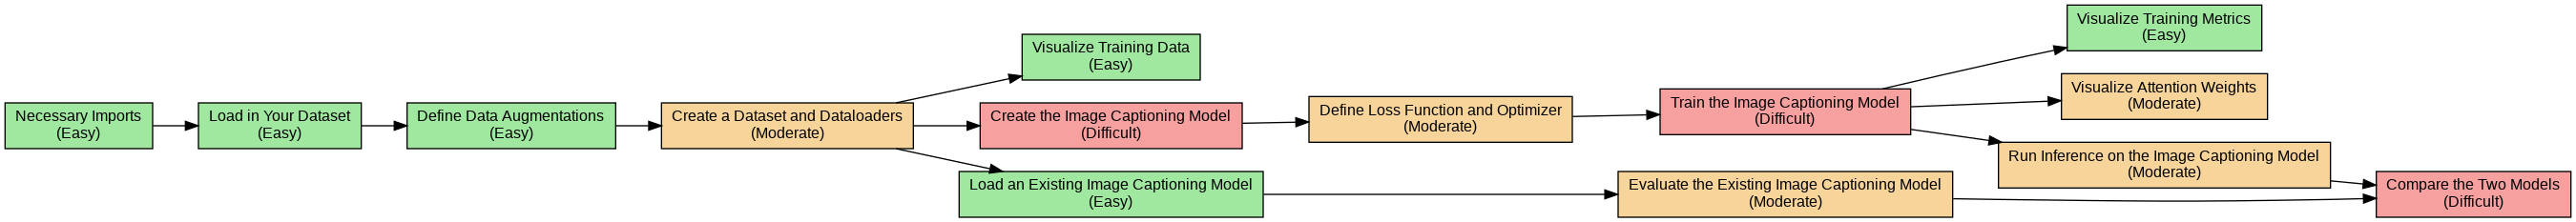

In [ ]:
# @title Image Captioning Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

    dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')

    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')

    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('CreateModel', 'Create the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

    dot.node('Hyperparameters', 'Define Loss Function and Optimizer\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TrainModel', 'Train the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
    dot.node('VisualizeAtt', 'Visualize Attention Weights\n(Moderate)', fillcolor='#F6D49A')
    dot.node('RunInference', 'Run Inference on the Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('LoadModel', 'Load an Existing Image Captioning Model\n(Easy)', fillcolor='#A0E7A0')

    dot.node('EvaluateModel', 'Evaluate the Existing Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('Comparison', 'Compare the Two Models\n(Difficult)', fillcolor='#F6A0A0')

    # Edges
    dot.edge('Imports', 'LoadData')

    dot.edge('LoadData', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')

    dot.edge('DatasetDataloader', 'CreateModel')
    dot.edge('DatasetDataloader', 'VisualizeSample')

    dot.edge('CreateModel', 'Hyperparameters')
    dot.edge('Hyperparameters', 'TrainModel')
    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'VisualizeAtt')
    dot.edge('TrainModel', 'RunInference')

    dot.edge('DatasetDataloader', 'LoadModel')
    dot.edge('LoadModel', 'EvaluateModel')
    dot.edge('RunInference', 'Comparison')
    dot.edge('EvaluateModel', 'Comparison')

    dot.render(output_filename, view=False)

create_flowchart('assignment1_flowchart')
IMG('assignment1_flowchart.png')

Each section of the Notebook will guide you through the task:

- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- The model is **not expected to achieve high performance** but must perform better than random color guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is November 25th Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

**In order to get your grade for an assignment, you must defend it by answering questions during the designated practice time.**

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:**  
**Neptun ID:**

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [ ]:
import os
import torch
import nltk
import torchvision
import torchaudio
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1. Data Loading Process**

For this assignment you will be using the [Flickr8k](https://www.kaggle.com/datasets/adityajn105/flickr8k) dataset, which contains **captions/descriptions** of different images.

<img src="https://user-images.githubusercontent.com/38347541/56469847-9faa0780-645c-11e9-822a-11a15bb56f5b.png" alt="1" border="0">

The best way to download this dataset is through `Kaggle`. First **create a token**, download it and upload it here. Follow [these](https://www.kaggle.com/discussions/general/74235) steps.

In [ ]:
# ADD YOUR CODE HERE

## **2. Defining Augmentations**

When applying **augmentations** to the `Flickr8k` dataset, it is important to note that these transformations should be applied **only to the images** and not to the captions.

Ensure that your **data augmentation pipeline** includes:
- A **normalization step** to scale pixel values appropriately.
- A **tensor conversion step** to transform images into tensors for model compatibility.
- Additional **augmentations of your choice**, such as random cropping, flipping, or color jittering, to enhance model generalization.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

## **3. Creating Datasets and Dataloaders**

To load the **Flickr8k** dataset, you need to create a **custom PyTorch** `Dataset` class that returns **images and their corresponding captions**. The captions should be **tokenized** before being returned.

Make sure to include special tokens in your tokenized captions:
- `sos` (Start of Sentence)
- `eos` (End of Sentence)
- `unk` (Unknown Token) for words outside the vocabulary.

It is recommended to build a **Vocabulary class** to store all the words in your dataset, as your model can only generate words that exist in this vocabulary. However, saving every word is unnecessary. A **common practice** is to include only words that appear **at least 5 times** across the entire dataset to reduce noise and improve model efficiency.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

> **Note**: Remember that, a batch has **different examples**, and each example (caption) might have **different sizes**. Therefore, consider padding techniques for the captions.

```python
class FlickrDataset(Dataset):
    def __init__(self,):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **4.1 Visualizing Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-target** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

Make sure to **visualize the original and the tokenized caption** as well!

```python
def visualize_batch():
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **4.2 Creating the Image Captioning Model**

For this assignment, **you are required to create your own custom image captioning model** and **compare its performance** with an existing pre-trained model.

---

### **Encoder-Attention-Decoder Architecture**

Your model should follow an **Encoder-Attention-Decoder** structure with the following components:

- The **Encoder** processes images to extract meaningful features. You can either design a **custom convolutional architecture** or use a **pre-trained model** like *ResNet*, but **fine-tuning is required** to adapt the features to the captioning task.
- The **Attention Layer** acts as an interface between the encoder and decoder. It leverages the extracted image features to compute **attention scores**, helping the decoder focus on relevant parts of the image during caption generation. For simplicity, use **Linear layers** to implement the attention mechanism.
- The **Decoder** is a sequence-based model (e.g., *LSTM*) that processes the image features and generates captions sequentially.

---

#### **Extra Credit Opportunity**
- Additional points will be awarded for implementing either a **Vision Transformer (ViT) encoder** or a **Transformer-based decoder** instead of an LSTM.

Here is an example of something similar to what we want to create:
<img src="https://drive.google.com/thumbnail?id=1wdddaLit7iEyCcVy5bS505NiYzL6c-4x&sz=w1000">

```python
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        return NotImplementedError

    def forward(self, images):
        return NotImplementedError
```

```python
class Attention(nn.Module):
    def __init__(self, encoder_dim,decoder_dim,attention_dim):
        super(Attention, self).__init__()
        return NotImplementedError

    def forward(self, features, hidden_state):
        return NotImplementedError
```

```python
class Decoder(nn.Module):
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim):
        return NotImplementedError

    def forward(self, features, captions):
        return NotImplementedError
```
```python
class EncoderDecoder(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim, encoder_dim,decoder_dim):
        return NotImplementedError

    def forward(self, images, captions):
        return NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
# ADD YOUR CODE HERE

## **5. Defining Loss Function and Optimizer**

**Loss Functions and their options:**

In an **image captioning task**, the model generates a sequence of words conditioned on an image. This involves both **sequence generation (language modeling)** and **image understanding**, making loss selection crucial for effective training. The primary loss function should optimize **word prediction** while ensuring **grammatical correctness and semantic coherence**.

Since our task involves **predicting discrete word tokens**, we typically use **sequence-based loss functions**, but we can also explore loss functions that account for **semantic meaning** and **alignment**.

---

### **a. Cross-Entropy Loss (Standard Sequence Prediction Loss)**  
The most common loss for text generation tasks is **Cross-Entropy Loss**, which measures the difference between the **predicted word probability distribution** and the **true word** in the sequence. It is computed as:

$$
\mathcal{L}_{CE} = -\sum_{t=1}^{T} y_t \log(\hat{y}_t)
$$

where:
- $T $ is the sequence length (number of words in the caption),
- $ y_t $ is the **ground truth word** (one-hot encoded),
- $ \hat{y}_t $ is the **predicted probability** of that word.

- **Pros:** Simple, well-established for text generation tasks, easy to implement.
- **Cons:** Treats each word prediction independently, ignoring sentence-level meaning, but useful during `teacher forcing`.

---

### **b. CIDER Loss (Reinforcement Learning-Based Caption Quality Loss)**  
Cross-Entropy loss focuses on **token-level** accuracy, but it does not capture **sentence-level fluency and meaning**. CIDER (Consensus-based Image Description Evaluation) helps optimize captions towards human-like descriptions.

$$
\mathcal{L}_{CIDEr} = 1 - CIDEr(\hat{Y}, Y)
$$

where $ CIDEr(\hat{Y}, Y) $ measures how similar the generated caption $ \hat{Y} $ is to multiple reference captions $ Y $.

- **Pros:** Optimizes for caption similarity to human references, improves fluency. Best suited for **fine-tuning after pretraining with Cross-Entropy** Loss.
- **Cons:** Harder to optimize, requires reinforcement learning.

---

### **c. Reinforcement Learning-Based Loss (REINFORCE with Self-Critical Sequence Training - SCST)**  
Since captioning is **sequential**, we can treat it as a reinforcement learning problem. Instead of directly predicting words, we train the model to maximize **rewards** (e.g., BLEU or CIDEr scores). This is done using the **REINFORCE** algorithm:

$$
\mathcal{L}_{RL} = - (r(\hat{Y}) - r(\bar{Y})) \sum_{t=1}^{T} \log P(y_t | y_{1:t-1}, X)
$$

where:
- $ r(\hat{Y}) $ is the reward for the generated caption,
- $ r(\bar{Y}) $ is the baseline reward (e.g., score from a greedy decoder).

- **Pros:** Optimizes **sentence-level metrics** instead of per-word accuracy, leading to better captions.  
- **Cons:** Computationally expensive, requires careful tuning.   

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

## **6. Training the Image Captioning Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

> **Note**: Pay attention to your choices. **Be aware of overfitting** and underfitting. Make sure the **loss is decreasing over the epochs**. Save the losses so that they can be visualized.

In [ ]:
# ADD YOUR CODE HERE

## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **7.2 Visualizing Attention Weights**

Visualize the attention weigths in order to understand how your model learned.
For that, use the `context` variable returned by the **Attention class** to overlay them on the image.

```python
def plot_attention():
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **7.3 Running Inference on the Image Captioning Model**

Pass test images through the **custom-trained image captioning model**, then evaluate its performance on the test set. Use the **[BLEU score](https://pytorch.org/text/stable/data_metrics.html)** as the evaluation metric, implementing **BLEU-1, BLEU-2, BLEU-3, and BLEU-4**.

To improve performance on the validation and test sets, you may use **beam search decoding** instead of standard greedy decoding.  

[Beam Search](https://d2l.ai/chapter_recurrent-modern/beam-search.html) is a more sophisticated decoding algorithm that **considers multiple possible caption sequences at each time step instead of selecting the most probable word at every step (greedy decoding)**. It maintains a fixed number of candidate sequences (beam width) and expands them based on their cumulative probabilities, ultimately selecting the **most likely complete caption**.  

Using beam search can lead to **more fluent and accurate captions** by avoiding suboptimal word choices that greedy decoding might make.

```python
def test_model()
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **8. Loading an Existing Image Captioning Model**

You are free to select any pre-trained image captioning model available. We recommend considering the following options:

1. **BLIP (Bootstrapping Language-Image Pre-training):** BLIP is a versatile vision-language pre-training framework that excels in both understanding and generation tasks. It effectively utilizes noisy web data by generating and filtering synthetic captions, achieving SOTA results in image captioning. Pre-trained models and code are available on [GitHub](https://github.com/salesforce/BLIP) and the [Hugging Face Model Hub](https://huggingface.co/Salesforce/blip-image-captioning-base).

2. **ViT-GPT2 Image Captioning Model:** This model combines a Vision Transformer (ViT) as the encoder and GPT-2 as the decoder, effectively connecting visual inputs with text generation. A fine-tuned version on the Flickr8k dataset is accessible on the [Hugging Face Model Hub](https://huggingface.co/NourFakih/image-captioning-Vit-GPT2-Flickr8k).

In [ ]:
# ADD YOUR CODE HERE

## **9. Evaluating the Existing Image Captioning Model**

For evaluation, apply the **same metrics** used in the assessment of your custom image captioning model to ensure a consistent and fair comparison.

In [ ]:
# ADD YOUR CODE HERE

## **10. Comparing the Two Models**

Compare the performance of both models using **BLEU-1, BLEU-2, BLEU-3, and BLEU-4** scores. Visualize predictions from both models on the **same batch of test images** to highlight their differences.

Analyze and justify the differences in performance, discussing factors such as model architecture, attention mechanisms, and training strategies. Finally, **propose possible improvements for your custom model**.

> **Answer**:

In [ ]:
# ADD YOUR CODE HERE

Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
from datetime import datetime, timedelta, timezone

deadline = datetime(2025, 11, 25, 23, 59, 0, tzinfo=timezone.utc)

def time_until_deadline():
    now = datetime.now(timezone.utc)
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 21 days, 14 hours, 3 minutes
